In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import re
import seaborn as sns
import operator
from IPython import get_ipython
ipy = get_ipython()
if ipy is not None:
    ipy.run_line_magic('matplotlib', 'inline')
dataset_csv = pd.read_csv('drive/My Drive/AML/analysis_data/Image_class.csv')
classname_csv = pd.read_csv('drive/My Drive/AML/analysis_data/class_name.csv')
print(dataset_csv.head())
print(classname_csv.head())

   Image_number  Class
0             1      1
1             2      1
2             3      1
3             4      1
4             5      1
   Class                   Names
0      1  Black_footed_Albatross
1      2        Laysan_Albatross
2      3         Sooty_Albatross
3      4       Groove_billed_Ani
4      5          Crested_Auklet


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


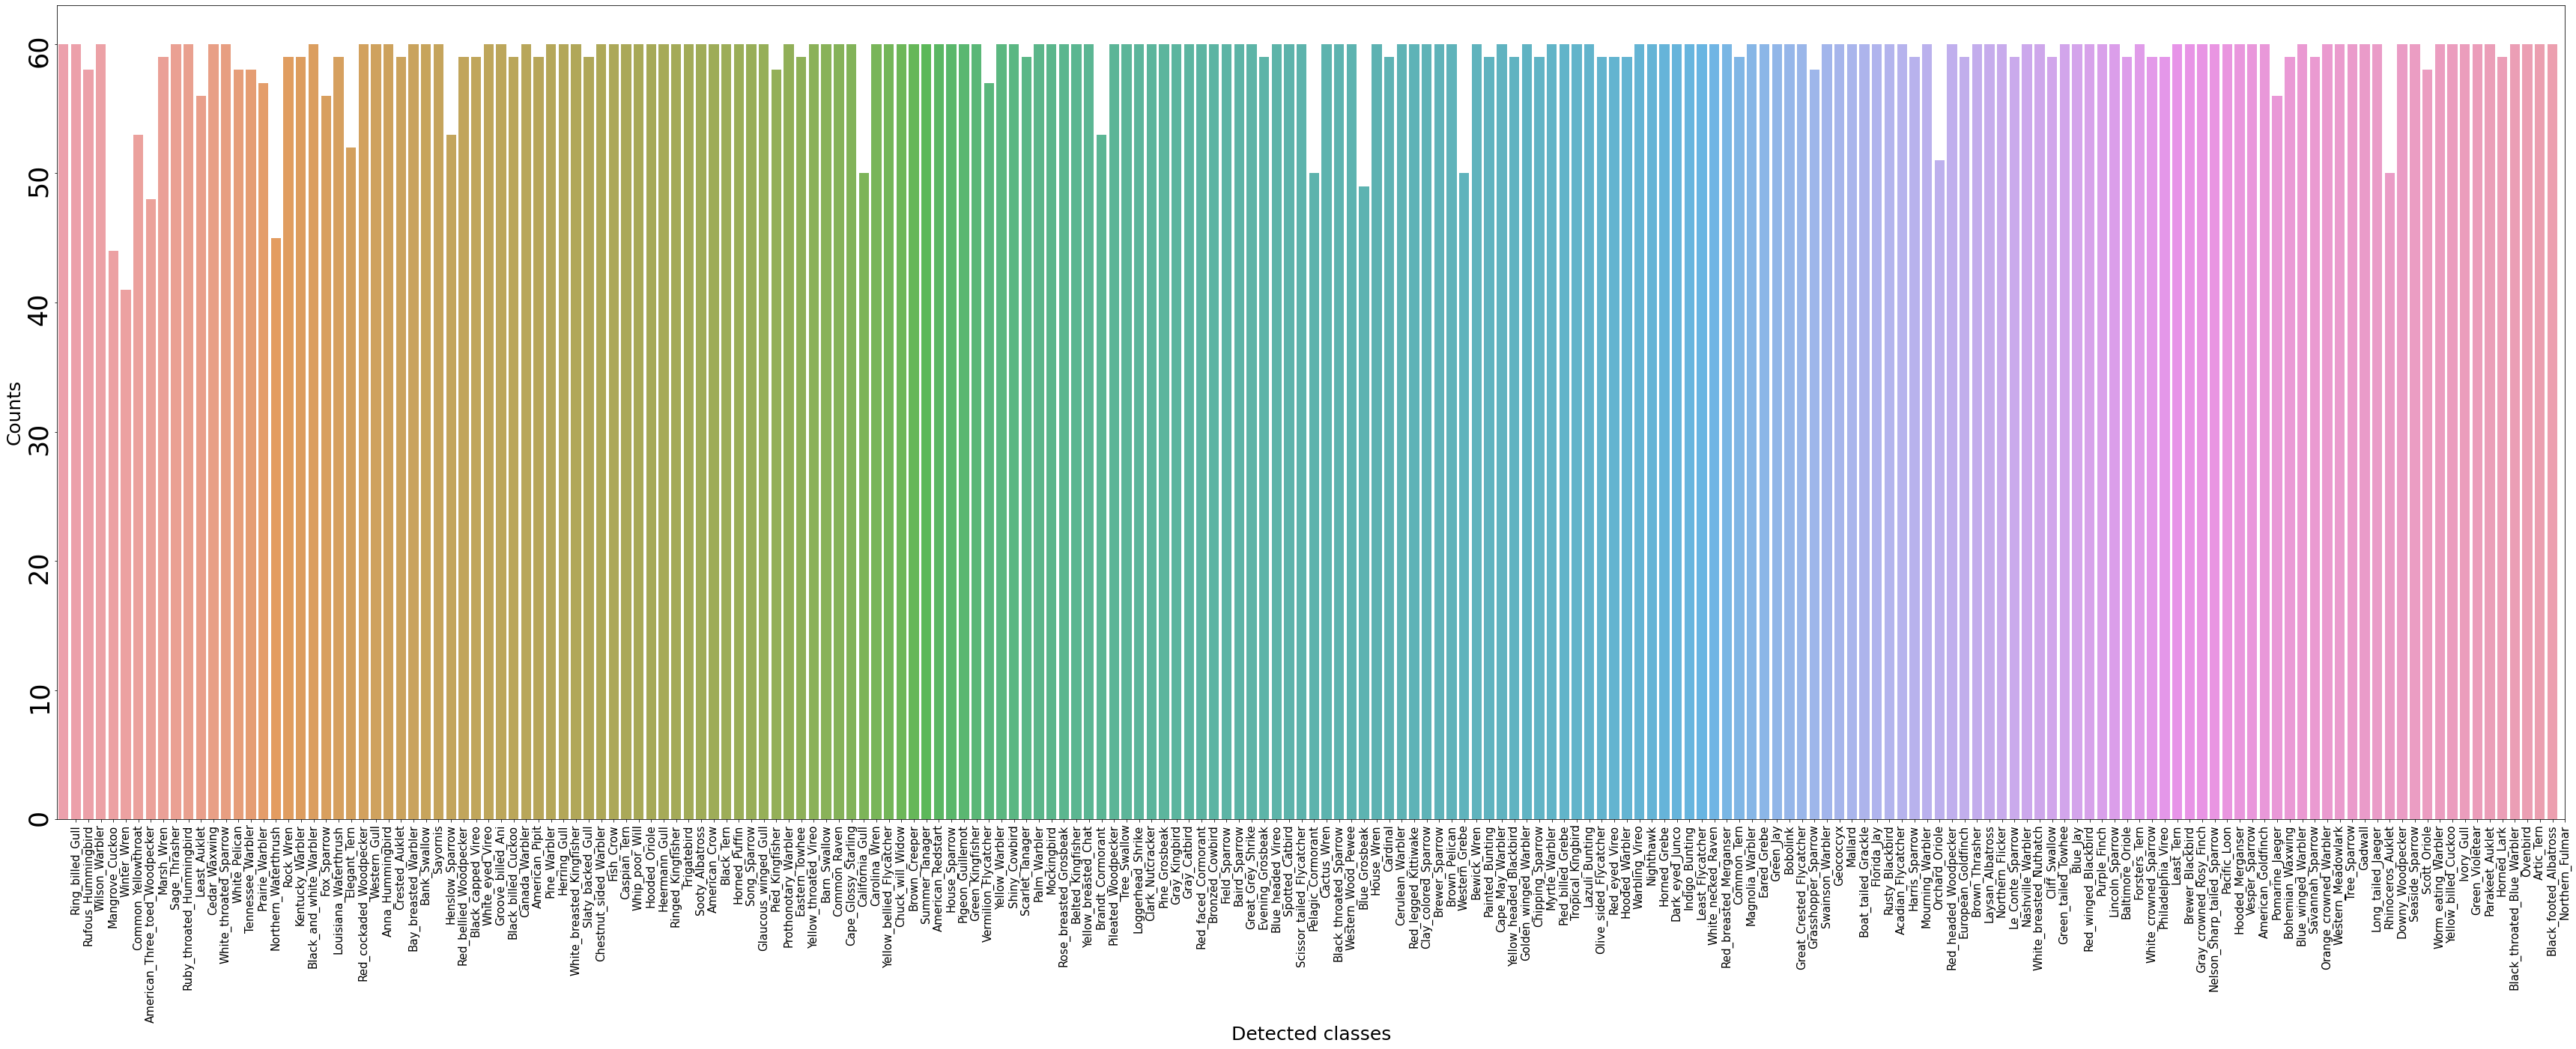

In [138]:
detected_counts = dataset_csv.Class.value_counts()
plt.figure(figsize = (60,20))
sns.barplot(detected_counts.index, detected_counts.values, alpha = 0.9)
plt.xticks(detected_counts.index,classname_csv['Names'], rotation = 'vertical',fontsize=15)
plt.yticks(rotation = 'vertical',fontsize=35)
plt.xlabel('Detected classes', fontsize =25)
plt.ylabel('Counts', fontsize = 25)
plt.show()

In [139]:
for i in range(0,200):
     dataset_csv['Class'] = dataset_csv['Class'].replace(i+1,classname_csv['Names'][i])

In [140]:
dict_word_frequency={}

for word in dataset_csv['Class']:
  if word not in dict_word_frequency: dict_word_frequency[word]=1
  else: dict_word_frequency[word]+=1

In [161]:
sorted_list = sorted(dict_word_frequency.items(), key=operator.itemgetter(1), reverse=True)
i=0
j=0
for word,frequency in sorted_list:
  i+=1
  print (str(i)+". "+str(word)+" - "+str(frequency))
  j=j+frequency

1. Black_footed_Albatross - 60
2. Laysan_Albatross - 60
3. Groove_billed_Ani - 60
4. Red_winged_Blackbird - 60
5. Rusty_Blackbird - 60
6. Bobolink - 60
7. Indigo_Bunting - 60
8. Eastern_Towhee - 60
9. Pelagic_Cormorant - 60
10. Bronzed_Cowbird - 60
11. Shiny_Cowbird - 60
12. American_Crow - 60
13. Fish_Crow - 60
14. Black_billed_Cuckoo - 60
15. Purple_Finch - 60
16. Northern_Flicker - 60
17. Great_Crested_Flycatcher - 60
18. Olive_sided_Flycatcher - 60
19. Scissor_tailed_Flycatcher - 60
20. Vermilion_Flycatcher - 60
21. Frigatebird - 60
22. Northern_Fulmar - 60
23. Gadwall - 60
24. American_Goldfinch - 60
25. European_Goldfinch - 60
26. Boat_tailed_Grackle - 60
27. Eared_Grebe - 60
28. Horned_Grebe - 60
29. Pied_billed_Grebe - 60
30. Western_Grebe - 60
31. Blue_Grosbeak - 60
32. Evening_Grosbeak - 60
33. Pine_Grosbeak - 60
34. Rose_breasted_Grosbeak - 60
35. California_Gull - 60
36. Heermann_Gull - 60
37. Herring_Gull - 60
38. Ivory_Gull - 60
39. Ring_billed_Gull - 60
40. Western_Gull 

In [142]:
print ("the total number of images = "+str(j))
print ("Total number of classes = "+str(i))

the total number of images = 11788
Total number of classes = 200


In [143]:
print("average number of images for a class = "+str(j/i))

average number of images for a class = 58.94


In [144]:
ts = pd.read_csv('drive/My Drive/AML/analysis_data/testtrain.csv')

In [151]:
train = []
test= []
for i in range(0,11788):
  if(ts['t_s'][i]==1):
    train.append(dataset_csv['Class'][i])
  else:
    test.append(dataset_csv['Class'][i])

In [164]:
print("the dataset is divided into "+str(len(train)*100/(len(train)+len(test)))+"% train set and "+str(len(test)*100/(len(train)+len(test)))+"% test set")
print("number of images in trainset = "+str(len(train)))
print("number of images in testset = "+str(len(test)))

the dataset is divided into 50.848320325755004% train set and 49.151679674244996% test set
number of images in trainset = 5994
number of images in testset = 5794


In [160]:
dict_train={}
dict_test={}

for word in train:
  if word not in dict_train: dict_train[word]=1
  else: dict_train[word]+=1
for word in test:
  if word not in dict_test: dict_test[word]=1
  else: dict_test[word]+=1


In [162]:
sorted_list = sorted(dict_train.items(), key=operator.itemgetter(1), reverse=True) #no.of words
i=0
j=0
for word,frequency in sorted_list:
  i+=1
  print (str(i)+". "+str(word)+" - "+str(frequency))

1. Black_footed_Albatross - 30
2. Laysan_Albatross - 30
3. Sooty_Albatross - 30
4. Groove_billed_Ani - 30
5. Crested_Auklet - 30
6. Least_Auklet - 30
7. Parakeet_Auklet - 30
8. Rhinoceros_Auklet - 30
9. Brewer_Blackbird - 30
10. Red_winged_Blackbird - 30
11. Rusty_Blackbird - 30
12. Yellow_headed_Blackbird - 30
13. Bobolink - 30
14. Indigo_Bunting - 30
15. Lazuli_Bunting - 30
16. Painted_Bunting - 30
17. Cardinal - 30
18. Spotted_Catbird - 30
19. Gray_Catbird - 30
20. Yellow_breasted_Chat - 30
21. Eastern_Towhee - 30
22. Chuck_will_Widow - 30
23. Brandt_Cormorant - 30
24. Red_faced_Cormorant - 30
25. Pelagic_Cormorant - 30
26. Bronzed_Cowbird - 30
27. Shiny_Cowbird - 30
28. Brown_Creeper - 30
29. American_Crow - 30
30. Fish_Crow - 30
31. Black_billed_Cuckoo - 30
32. Mangrove_Cuckoo - 30
33. Yellow_billed_Cuckoo - 30
34. Gray_crowned_Rosy_Finch - 30
35. Purple_Finch - 30
36. Northern_Flicker - 30
37. Acadian_Flycatcher - 30
38. Great_Crested_Flycatcher - 30
39. Least_Flycatcher - 30
40.

In [163]:
sorted_list = sorted(dict_test.items(), key=operator.itemgetter(1), reverse=True) #no.of words
i=0
for word,frequency in sorted_list:
  i+=1
  print (str(i)+". "+str(word)+" - "+str(frequency))

1. Black_footed_Albatross - 30
2. Laysan_Albatross - 30
3. Groove_billed_Ani - 30
4. Red_winged_Blackbird - 30
5. Rusty_Blackbird - 30
6. Bobolink - 30
7. Indigo_Bunting - 30
8. Eastern_Towhee - 30
9. Pelagic_Cormorant - 30
10. Bronzed_Cowbird - 30
11. Shiny_Cowbird - 30
12. American_Crow - 30
13. Fish_Crow - 30
14. Black_billed_Cuckoo - 30
15. Purple_Finch - 30
16. Northern_Flicker - 30
17. Great_Crested_Flycatcher - 30
18. Olive_sided_Flycatcher - 30
19. Scissor_tailed_Flycatcher - 30
20. Vermilion_Flycatcher - 30
21. Frigatebird - 30
22. Northern_Fulmar - 30
23. Gadwall - 30
24. American_Goldfinch - 30
25. European_Goldfinch - 30
26. Boat_tailed_Grackle - 30
27. Eared_Grebe - 30
28. Horned_Grebe - 30
29. Pied_billed_Grebe - 30
30. Western_Grebe - 30
31. Blue_Grosbeak - 30
32. Evening_Grosbeak - 30
33. Pine_Grosbeak - 30
34. Rose_breasted_Grosbeak - 30
35. California_Gull - 30
36. Heermann_Gull - 30
37. Herring_Gull - 30
38. Ivory_Gull - 30
39. Ring_billed_Gull - 30
40. Western_Gull 